## L4 - More Probabilistic Reasoning - Discrete

### Calculating letter frequencies in text

Here we illustrate basic probabilistic relationships using the probabilities of charcters as an example.

First we define some iterface functions to keep the design flexible and a code for our character set.  Characters are normalized first, and then tested to see if it should be counted.

In [1]:
charset = ['a':'z'; ' ']
pairset = charset .* permutedims(charset) # outer product
N = length(charset)
normalize(c)  = lowercase(c)
iscounting(c) = isletter(c) || c == ' '
char2index(c) = (c == ' ') ? N : c - 'a' + 1
index2char(i) = (i == N)  ? ' ' : Char('a' + i - 1)

index2char (generic function with 1 method)

In [2]:
function letterprob(filename)
    count = zeros(Int, N)
    f = open(filename)
    while !eof(f)
        c = normalize(read(f, Char))
        iscounting(c) && (count[char2index(c)] += 1) # short-circuit evaluation
    end
    return count ./ sum(count)
end

letterprob (generic function with 1 method)

In [3]:
p = letterprob("HP1.txt")

27-element Array{Float64,1}:
 0.06431155915018769  
 0.012886498200534035 
 0.016195193684454937 
 0.04019049185403042  
 0.09653989783677103  
 0.01658459424944855  
 0.020846232730931464 
 0.05449431136565922  
 0.0503439301884602   
 0.0008948957083704191
 0.009696315932045974 
 0.03529758910258891  
 0.017883402345110485 
 ⋮                    
 0.013418598351456987 
 0.0010158275608529081
 0.05236349212491777  
 0.04768101079679579  
 0.07025656901822686  
 0.023593804419333616 
 0.007033396540381564 
 0.020309295305909213 
 0.0009263379900158662
 0.020846232730931464 
 0.0006385201811075423
 0.1897396579079757   

In [4]:
@time letterprob("HP1.txt");

  0.035366 seconds (800.53 k allocations: 12.216 MiB, 10.17% gc time)


In [5]:
using Printf
k = sortperm(p, rev=true)
for i in k
    @printf("%c: %.4f\n", index2char(i), p[i])
end

 : 0.1897
e: 0.0965
t: 0.0703
a: 0.0643
o: 0.0632
h: 0.0545
n: 0.0528
r: 0.0524
i: 0.0503
s: 0.0477
d: 0.0402
l: 0.0353
u: 0.0236
g: 0.0208
y: 0.0208
w: 0.0203
m: 0.0179
f: 0.0166
c: 0.0162
p: 0.0134
b: 0.0129
k: 0.0097
v: 0.0070
q: 0.0010
x: 0.0009
j: 0.0009
z: 0.0006


┌ Info: Recompiling stale cache file /Users/mike/.julia/compiled/v1.1/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184


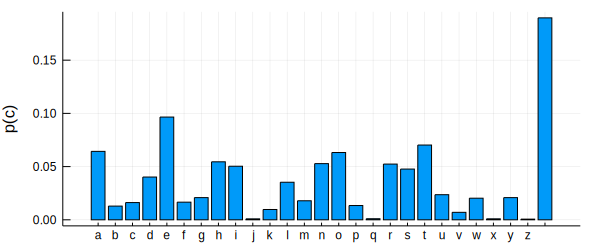

In [6]:
using Plots
default(legend=false)
bar(p, xticks=(1:N, charset), ylabel="p(c)", size=(600,250))

### Calculating the Probability of Letter Pairs

In [7]:
function pairprob(filename)
    count = zeros(Int, N, N)
    f = open(filename)

    first = true
    c = ' '
    while !eof(f)
        nextc = normalize(read(f, Char))
        if iscounting(nextc)
            !first && (count[char2index(c), char2index(nextc)] += 1)
            first = false
            c = nextc
        end
    end
    return count ./ sum(count)
end

pairprob (generic function with 1 method)

In [8]:
pp = pairprob("HP1.txt")

27×27 Array{Float64,2}:
 5.80474e-5   0.00111258   0.00222757   …  5.32101e-5   0.00459784 
 0.00135686   0.000295074  2.41864e-6      0.0          0.000104002
 0.00213082   0.0          5.80474e-5      0.0          0.000224934
 0.000960201  1.93491e-5   7.25593e-6      0.0          0.0252482  
 0.00531134   9.19084e-5   0.00119481      5.07915e-5   0.0343665  
 0.00109806   9.67457e-6   2.41864e-6   …  0.0          0.004697   
 0.00104244   2.17678e-5   0.0             4.83729e-6   0.00773966 
 0.0118127    9.67457e-6   1.20932e-5      0.0          0.00422537 
 0.000362796  0.00033861   0.00197119      0.000384564  0.00161082 
 7.49779e-5   0.0          0.0             0.0          0.0        
 6.04661e-5   2.41864e-6   0.0          …  0.0          0.00327484 
 0.00237027   4.35356e-5   0.00015963      0.0          0.00500901 
 0.00210422   0.000940852  0.000266051     0.0          0.00398592 
 ⋮                                      ⋱  ⋮                       
 0.0011029    5.56288e-5

In [9]:
@time pairprob("HP1.txt");

  0.035082 seconds (565.58 k allocations: 8.642 MiB, 15.96% gc time)


In [10]:
# show 10-thousandths (need Text constructor to omit quotes in display)
[Text(string(x[1], " ", round(Int, 10_000*x[2]))) for x in zip(pairset, pp)]

27×27 Array{Text{String},2}:
 aa 1    ab 11  ac 22  ad 35   ae 0    …  aw 5    ax 0  ay 18  az 1  a  46 
 ba 14   bb 3   bc 0   bd 0    be 39      bw 0    bx 0  by 5   bz 0  b  1  
 ca 21   cb 0   cc 1   cd 0    ce 18      cw 0    cx 0  cy 1   cz 0  c  2  
 da 10   db 0   dc 0   dd 7    de 29      dw 1    dx 0  dy 4   dz 0  d  252
 ea 53   eb 1   ec 12  ed 101  ee 36      ew 8    ex 7  ey 30  ez 1  e  344
 fa 11   fb 0   fc 0   fd 0    fe 17   …  fw 0    fx 0  fy 1   fz 0  f  47 
 ga 10   gb 0   gc 0   gd 0    ge 21      gw 2    gx 0  gy 0   gz 0  g  77 
 ha 118  hb 0   hc 0   hd 0    he 235     hw 0    hx 0  hy 2   hz 0  h  42 
 ia 4    ib 3   ic 20  id 50   ie 13      iw 0    ix 1  iy 0   iz 4  i  16 
 ja 1    jb 0   jc 0   jd 0    je 1       jw 0    jx 0  jy 0   jz 0  j  0  
 ka 1    kb 0   kc 0   kd 0    ke 32   …  kw 0    kx 0  ky 1   kz 0  k  33 
 la 24   lb 0   lc 2   ld 24   le 71      lw 1    lx 0  ly 28  lz 0  l  50 
 ma 21   mb 9   mc 3   md 0    me 40      mw 0    mx 0  my 

In [11]:
k = sortperm(pp[:], rev=true)
for i=1:min(25, length(k))
    @printf("%s: %.4f\n", pairset[k[i]], pp[k[i]])
end

e : 0.0344
 t: 0.0277
d : 0.0252
he: 0.0235
t : 0.0221
th: 0.0213
 h: 0.0207
s : 0.0197
 a: 0.0184
 s: 0.0155
in: 0.0150
 w: 0.0135
y : 0.0133
n : 0.0128
er: 0.0127
ha: 0.0118
an: 0.0102
r : 0.0101
ed: 0.0101
 i: 0.0101
ou: 0.0097
re: 0.0097
 o: 0.0096
ar: 0.0092
 b: 0.0090


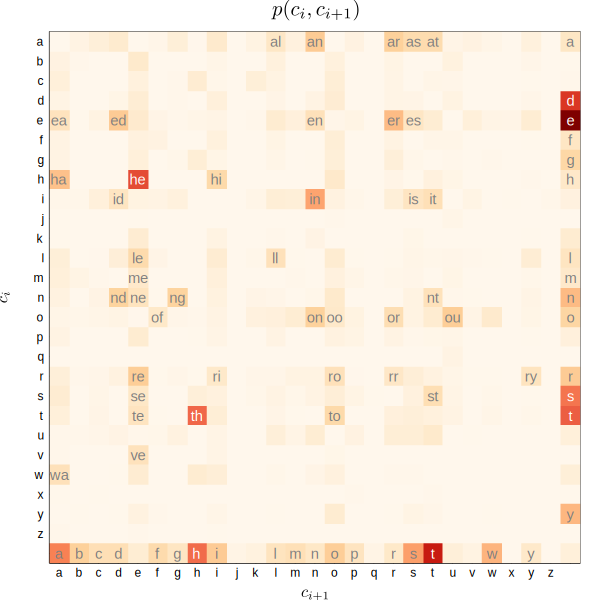

In [12]:
using StatsBase, LaTeXStrings

fig = heatmap(pp, c=:OrRd, # Brewer is best
    xticks=(1:N, charset), yticks=(1:N, charset), yaxis=:flip,
    size=(600,600), framestyle=:box, 
    xlabel=L"c_{i+1}", ylabel=L"c_i", title=L"p(c_i, c_{i+1})")

thresh = percentile(pp[:], 90)
whitethresh = percentile(pp[:], 99)
for i=1:N, j=1:N
    if pp[i, j] > thresh
        tc = (pp[i, j] > whitethresh) ? :white : :gray
        # FIX: the space in pairs with spaces get stripped..
        annotate!(fig, j, i, text(pairset[i, j], 10, tc)) # annotate!(xpos, ypos, ...)
    end
end
fig # need this, because REPL in jupyter only displays last returned value

### Calculating the Marginal Probability

We can use the joint pdf to compute the margin distribution

$$
p(c_{i}) = \sum_{c_{i} \in \mathcal{C}} p(c_i, c_{i+1}), 
$$

where $\mathcal{C}$ is the character set.

This is hard to read and doesn't have an obvious correspondence to the row-column entries, so let's use $p(i, j) = p(c_i, c_{i+1})$.  To calculate the marginals, we'll use $k$ as the summation variable:

$$
p(i) = \sum_{k \in \mathcal{C}} p(i, j = k).
$$

We could also compute the marginal of the 2nd character

$$
p(j) = \sum_{k \in \mathcal{C}} p(i = k, j),
$$

but in this example, they are the same, since they share the same character set $\mathcal{C}$.  To compute them, we just sum over the columns (or rows) of the matrix `pp`.

In [13]:
pi = sum(pp, dims=2) # p(i) = sum over j, i.e. the colums of p(i, j)

27×1 Array{Float64,2}:
 0.06431171469688358  
 0.012886529368371407 
 0.016195232854845146 
 0.04019058906047816  
 0.09654013133230943  
 0.016584634361659672 
 0.020846283150524243 
 0.05449444316793848  
 0.050344051952449474 
 0.0008948978728035698
 0.009696339383971653 
 0.03529767447485216  
 0.01788344559867458  
 ⋮                    
 0.01341863080625461  
 0.0010158300177770254
 0.05236361877350618  
 0.047681126120134    
 0.07025673894377864  
 0.023593861484321146 
 0.007033413551656167 
 0.0203093444268421   
 0.0009263402304966682
 0.020846283150524243 
 0.0006385217254598444
 0.18973769817755254  

In [14]:
pj = sum(pp, dims=1) # p(j) = sum over i, i.e. the rows of p(i, j)

1×27 Array{Float64,2}:
 0.0643117  0.0128865  0.0161952  …  0.0208463  0.000638522  0.18974

We can verify that they give the same result: (Aside: `pi` and `pj` are column (27x1) and row vectors (1x27) respectively, so we need to use the transpose operator `'` to subtract them, and displaying as rows is more compact.)

In [15]:
pi' - pj

1×27 Array{Float64,2}:
 0.0  0.0  3.46945e-18  -6.93889e-18  …  -1.0842e-19  -2.41864e-6

And this $p(i)$ is the same (within numerical error) as what we calculated directly from the text:

In [16]:
(p - pi)'

1×27 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 -1.55547e-7  -3.11678e-8  -3.91704e-8  …  -1.54435e-9  1.95973e-6

### Calculating Conditional Probabilities

We can use the joint and marginal pdfs to calculate the conditional probability

$$
p(j|i) = \frac{p(i, j)}{p(i)}
$$

In [17]:
pij = pp

27×27 Array{Float64,2}:
 5.80474e-5   0.00111258   0.00222757   …  5.32101e-5   0.00459784 
 0.00135686   0.000295074  2.41864e-6      0.0          0.000104002
 0.00213082   0.0          5.80474e-5      0.0          0.000224934
 0.000960201  1.93491e-5   7.25593e-6      0.0          0.0252482  
 0.00531134   9.19084e-5   0.00119481      5.07915e-5   0.0343665  
 0.00109806   9.67457e-6   2.41864e-6   …  0.0          0.004697   
 0.00104244   2.17678e-5   0.0             4.83729e-6   0.00773966 
 0.0118127    9.67457e-6   1.20932e-5      0.0          0.00422537 
 0.000362796  0.00033861   0.00197119      0.000384564  0.00161082 
 7.49779e-5   0.0          0.0             0.0          0.0        
 6.04661e-5   2.41864e-6   0.0          …  0.0          0.00327484 
 0.00237027   4.35356e-5   0.00015963      0.0          0.00500901 
 0.00210422   0.000940852  0.000266051     0.0          0.00398592 
 ⋮                                      ⋱  ⋮                       
 0.0011029    5.56288e-5

In [18]:
# Visualize the joint pdf with the marginals in the margins.
# Aside: Matrix construction: ' ' is horizontal concatenation, ';' is vertical.
# We use 2 as a sentinel since it can't be a probability.
mm = [pij fill(2, size(pi)) pi; [fill(2, size(pj)) 2 2]; [pj 2 2]]
[Text(x == 2 ? ' ' : round(x, digits=3)) for x in mm]

29×29 Array{Text,2}:
 0.0    0.001  0.002  0.004  0.0    0.0    …  0.002  0.0    0.005     0.064
 0.001  0.0    0.0    0.0    0.004  0.0       0.0    0.0    0.0       0.013
 0.002  0.0    0.0    0.0    0.002  0.0       0.0    0.0    0.0       0.016
 0.001  0.0    0.0    0.001  0.003  0.0       0.0    0.0    0.025     0.04 
 0.005  0.0    0.001  0.01   0.004  0.001     0.003  0.0    0.034     0.097
 0.001  0.0    0.0    0.0    0.002  0.001  …  0.0    0.0    0.005     0.017
 0.001  0.0    0.0    0.0    0.002  0.0       0.0    0.0    0.008     0.021
 0.012  0.0    0.0    0.0    0.024  0.0       0.0    0.0    0.004     0.054
 0.0    0.0    0.002  0.005  0.001  0.001     0.0    0.0    0.002     0.05 
 0.0    0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0       0.001
 0.0    0.0    0.0    0.0    0.003  0.0    …  0.0    0.0    0.003     0.01 
 0.002  0.0    0.0    0.002  0.007  0.001     0.003  0.0    0.005     0.035
 0.002  0.001  0.0    0.0    0.004  0.0       0.0    0.0    0.004  

Each entry in the conditional probability table defines $p(j = c_j | i = c_i)$, so it is the same size as the joint distribution table for $p(i,j)$.  The difference is that $p(j|i)$ is a normalized pdf given the first character $i = c_i$.  Therefore, all we are doing when calculating $p(j|i)$ is dividing each row $p(i = c_i, j)$ by its sum, i.e. the marginal $p(i = c_i)$, which normalizes it to a valid conditional probability distribution.

In [19]:
sum(pij[1, :])

0.06431171469688358

These are equivalent:

In [20]:
(pij[1, :] / sum(pij[1, :]))'

1×27 LinearAlgebra.Adjoint{Float64,Array{Float64,1}}:
 0.000902595  0.0172997  0.0346371  …  0.0277924  0.000827379  0.071493

In [21]:
(pij[1, :] / pi[1])'

1×27 LinearAlgebra.Adjoint{Float64,Array{Float64,1}}:
 0.000902595  0.0172997  0.0346371  …  0.0277924  0.000827379  0.071493

And the marginal does sum to one:

In [22]:
sum(pij[1, :] / pi[1])

1.0

To calculate the whole conditional probability table, we just loop through the rows.

In [23]:
pjgi = similar(pij)
for k=1:N
    pjgi[k, :] = pij[k, :] / pi[k]
end
pjgi

27×27 Array{Float64,2}:
 0.000902595  0.0172997    0.0346371    …  0.000827379  0.071493  
 0.105293     0.0228979    0.000187688     0.0          0.00807057
 0.131571     0.0          0.00358423      0.0          0.0138889 
 0.0238912    0.000481435  0.000180538     0.0          0.628212  
 0.0550169    0.000952023  0.0123763       0.000526118  0.355981  
 0.0662097    0.000583345  0.000145836  …  0.0          0.283214  
 0.0500058    0.0010442    0.0             0.000232045  0.371273  
 0.216768     0.000177533  0.000221916     0.0          0.0775376 
 0.00720634   0.00672592   0.0391545       0.00763872   0.0319962 
 0.0837838    0.0          0.0             0.0          0.0       
 0.00623597   0.000249439  0.0          …  0.0          0.33774   
 0.0671509    0.00123338   0.00452241      0.0          0.141908  
 0.117663     0.0526102    0.0148769       0.0          0.222883  
 ⋮                                      ⋱  ⋮                      
 0.0821918    0.00414564   0.0        

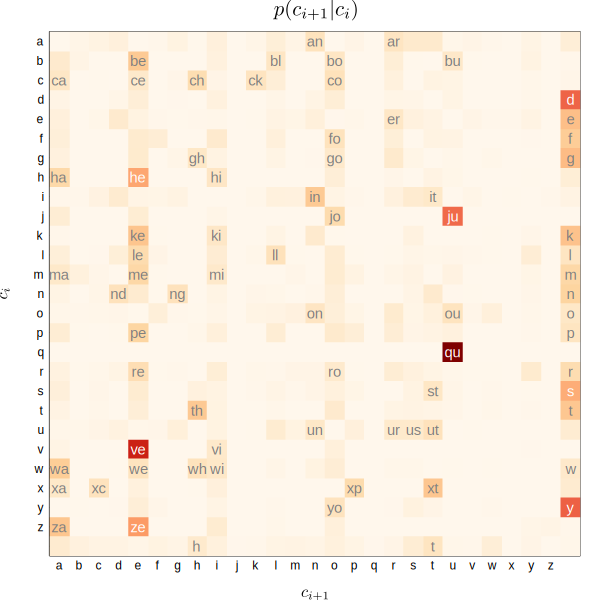

In [24]:
fig = heatmap(pjgi, c=:OrRd, 
    xticks=(1:N, charset), yticks=(1:N, charset), yaxis=:flip,
    size=(600,600), framestyle=:box, 
    xlabel=L"c_{i+1}", ylabel=L"c_i", title=L"p(c_{i+1} | c_i)")

thresh = percentile(pjgi[:], 90)
whitethresh = percentile(pjgi[:], 99)
for i=1:N, j=1:N
    if pjgi[i, j] > thresh
        tc = (pjgi[i, j] > whitethresh) ? :white : :gray
        # FIX: the space in pairs with spaces get stripped..
        annotate!(fig, j, i, text(pairset[i, j], 10, tc)) # annotate!(xpos, ypos, ...)
    end
end
fig

Now the table looks quite different, because each row is normalized.  Notice that many letters can be followed by a space, but the character after the space, is mainly 'h' or 't'.  We also see that $p(j = \texttt{u} | i = \texttt{q})$ is very high, in fact 1.0:

In [25]:
pjgi[char2index('q'), char2index('u')] # this p(j|i) but the matrix is still [i,j]

1.0

In [26]:
pjgi[char2index('v'), char2index('o')]

0.059834938101788165

In [27]:
pjgi[char2index('r'), char2index('o')]

0.10909930715935334

### Calculating Other Probabilities

We can use the joint distribution to calculate other probabilities.

In [28]:
function probany(chars, charprob)
    sumprob = 0.0
    for c in unique(chars)
        c = normalize(c)
        isvalid(c) && (sumprob += charprob[char2index(c)])
    end
    return sumprob
end

probany (generic function with 1 method)

In [29]:
unique("aabbc")

3-element Array{Char,1}:
 'a'
 'b'
 'c'

In [30]:
unique([1, 2, 2, 3])

3-element Array{Int64,1}:
 1
 2
 3

In [31]:
probany("c", p)

0.016195193684454937

In [32]:
probany('c', p) # generic by default

0.016195193684454937

In [33]:
p[char2index('c')] # should be the same

0.016195193684454937

In [34]:
probany("aeiou", p)

0.2980147827096475

In [35]:
probany('a':'z', p)

0.8102603420920241

In [36]:
1 - p[char2index(' ')]

0.8102603420920242

### Synthesizing Character Strings from the Model

In [37]:
using StatsBase

In [38]:
s = ""
for n=1:100
    s *= sample(['a', 'b', 'c'], pweights([0.1, 0.3, 0.6]))
end
println(s)

for c in "abc"
    println(c, ": ", count(i -> i == c, s))
end

bccbacacbacbbcbccacbcbccccbcccbbbcccaacbbcbccbccbbcbccccbbbccbcbccccbccbaabcccccbbcaacccbbccabcbcccc
a: 11
b: 33
c: 56


In [39]:
function synth(n, condprob; initchar=' ')
    s = string(initchar)
    i = char2index(initchar)
    for k = 1:n
        j = sample(pweights(condprob[i, :]))
        s *= index2char(j)
        i = j
    end
    return s
end

synth (generic function with 1 method)

In [43]:
synth(10, pjgi; initchar='q')

"qun bano ff"

In [50]:
synth(10, pjgi; initchar='h')

"hedghe quno"

### Higher Order?


In [65]:
function nextvalid(f)
    while !eof(f)
        c = normalize(read(f, Char))
        iscounting(c) && return c
    end
    return nothing
end

function tripleprob(filename)
    count = zeros(Int, N, N, N)
    f = open(filename)

    c1 = nextvalid(f)
    c2 = nextvalid(f)
    while !eof(f)
        c3 = nextvalid(f)
        i, j, k = map(char2index, [c1, c2, c3])
        count[i, j, k] += 1
        c1 = c2
        c2 = c3
    end
    return count ./ sum(count)
end

tripleprob (generic function with 1 method)

In [69]:
ppp=tripleprob("HP1.txt")

27×27×27 Array{Float64,3}:
[:, :, 1] =
 4.1117e-5   4.8373e-6   7.25595e-6   …  0.0          4.8373e-5  
 0.0         7.25595e-6  0.0             0.0          9.67459e-6 
 0.0         0.0         9.67459e-6      0.0          3.62797e-5 
 0.0         2.41865e-6  2.41865e-6      0.0          0.00267503 
 2.41865e-6  1.45119e-5  0.000253958     0.0          0.00249605 
 0.0         0.0         2.41865e-6   …  0.0          0.00039424 
 0.0         0.0         0.0             4.8373e-6    0.00111016 
 4.8373e-6   0.0         0.0             0.0          0.000524847
 0.0         0.0         6.04662e-5      0.000198329  5.80476e-5 
 0.0         0.0         0.0             0.0          0.0        
 0.0         0.0         0.0          …  0.0          0.000495823
 0.0         0.0         0.0             0.0          0.00044745 
 0.0         4.8373e-6   0.0             0.0          0.000551452
 ⋮                                    ⋱  ⋮                       
 0.0         0.0         0.0         

In [64]:
# return characer triple from linear index
function triple(i)
    
end

k = sortperm(ppp[:], rev=true)
for i=1:min(25, length(k))
    @printf("%s: %.4f\n", triple(i))
end

UndefVarError: UndefVarError: find not defined

In [73]:
?LinearIndices

search: LinearIndices



```
LinearIndices(A::AbstractArray)
```

Return a `LinearIndices` array with the same shape and [`axes`](@ref) as `A`, holding the linear index of each entry in `A`. Indexing this array with cartesian indices allows mapping them to linear indices.

For arrays with conventional indexing (indices start at 1), or any multidimensional array, linear indices range from 1 to `length(A)`. However, for `AbstractVector`s linear indices are `axes(A, 1)`, and therefore do not start at 1 for vectors with unconventional indexing.

Calling this function is the "safe" way to write algorithms that exploit linear indexing.

# Examples

```jldoctest
julia> A = fill(1, (5,6,7));

julia> b = LinearIndices(A);

julia> extrema(b)
(1, 210)
```

```
LinearIndices(inds::CartesianIndices) -> R
LinearIndices(sz::Dims) -> R
LinearIndices((istart:istop, jstart:jstop, ...)) -> R
```

Return a `LinearIndices` array with the specified shape or [`axes`](@ref).

# Example

The main purpose of this constructor is intuitive conversion from cartesian to linear indexing:

```jldoctest
julia> linear = LinearIndices((1:3, 1:2))
3×2 LinearIndices{2,Tuple{UnitRange{Int64},UnitRange{Int64}}}:
 1  4
 2  5
 3  6

julia> linear[1,2]
4
```
